In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv("C:/Users/casper/Desktop/HotelReservations.csv",sep=";",encoding='latin-1')

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,945,0,Canceled


In [5]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9994,INN09995,3,0,0,4,Meal Plan 1,0,Room_Type 4,109,2018,8,24,Online,0,0,0,1521,0,Canceled
9995,INN09996,2,0,2,1,Meal Plan 1,0,Room_Type 1,55,2018,4,3,Offline,0,0,0,75,1,Not_Canceled
9996,INN09997,2,0,2,1,Meal Plan 1,0,Room_Type 1,2,2017,9,12,Online,0,0,0,13867,1,Not_Canceled
9997,INN09998,2,0,0,3,Meal Plan 1,0,Room_Type 1,105,2018,10,12,Offline,0,0,0,75,0,Not_Canceled
9998,INN09999,2,0,4,6,Meal Plan 1,0,Room_Type 1,207,2018,8,20,Offline,0,0,0,7225,0,Not_Canceled


In [6]:
df.shape

(9999, 19)

In [7]:
len(df)

9999

In [8]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
df.dtypes

Booking_ID                              object
no_of_adults                             int64
no_of_children                           int64
no_of_weekend_nights                     int64
no_of_week_nights                        int64
type_of_meal_plan                       object
required_car_parking_space               int64
room_type_reserved                      object
lead_time                                int64
arrival_year                             int64
arrival_month                            int64
arrival_date                             int64
market_segment_type                     object
repeated_guest                           int64
no_of_previous_cancellations             int64
no_of_previous_bookings_not_canceled     int64
avg_price_per_room                       int64
no_of_special_requests                   int64
booking_status                          object
dtype: object

In [10]:
df.isnull()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df['Booking_ID']

0       INN00001
1       INN00002
2       INN00003
3       INN00004
4       INN00005
          ...   
9994    INN09995
9995    INN09996
9996    INN09997
9997    INN09998
9998    INN09999
Name: Booking_ID, Length: 9999, dtype: object

In [12]:
summarizeNumCol=df.describe()

In [13]:
print("Bütün sayısal sütunları topla:")

Bütün sayısal sütunları topla:


In [14]:
summarizeNumCol

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.852585,0.102610,0.812281,2.198920,0.032803,85.413341,2017.823982,7.40054,15.592859,0.026503,0.018802,0.152615,2825.975798,0.638064
std,0.512956,0.400879,0.873509,1.421597,0.178130,86.198054,0.380854,3.05754,8.730670,0.160633,0.291999,1.698614,4432.299494,0.795765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.00000,8.000000,0.000000,0.000000,0.000000,100.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.00000,15.000000,0.000000,0.000000,0.000000,792.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.00000,23.000000,0.000000,0.000000,0.000000,1911.500000,1.000000
max,4.000000,10.000000,6.000000,15.000000,1.000000,443.000000,2018.000000,12.00000,31.000000,1.000000,11.000000,53.000000,26667.000000,5.000000


In [15]:
cnt=df["arrival_date"].count()

In [16]:
print("Count-->",cnt)# arrival date sütununda kaç satır var

Count--> 9999


In [17]:
summ=df["arrival_date"].astype(float).sum()

In [18]:
print("Toplam-->",summ)#arrival date sütunun toplamı

Toplam--> 155913.0


In [19]:
meann=df["arrival_date"].astype(float).mean()

In [20]:
print("Ortalama-->",meann)#arrival date sütunun ortalaması

Ortalama--> 15.592859285928593


In [21]:
medyan=df["arrival_date"].median()

In [22]:
print("Medyan=",medyan)#arrival date sütununun medyanı

Medyan= 15.0


In [23]:
std=df["arrival_date"].std()

In [24]:
print("Standart Sapma-->",std)#arrival date sütununun standart sapması

Standart Sapma--> 8.730669959108969


In [25]:
minn=df["arrival_date"].min()

In [26]:
print("Minimum-->",minn)#arrival date sütununun minimum değeri

Minimum--> 1


In [27]:
maximum=df["arrival_date"].max()

In [28]:
print("Maximum-->",maximum)#arrival date sütununun maksimum değeri

Maximum--> 31


In [29]:
kümtop=df["arrival_date"].cumsum#arrival date sütununun kümülatif toplamı

In [30]:
print("Kümülatif Toplam-->",kümtop)

Kümülatif Toplam--> <bound method NDFrame._add_numeric_operations.<locals>.cumsum of 0        2
1        6
2       28
3       20
4       11
        ..
9994    24
9995     3
9996    12
9997    12
9998    20
Name: arrival_date, Length: 9999, dtype: int64>


In [31]:
siralanmisveri=df.sort_values(by='arrival_date')

In [32]:
print("'arrival_date'kolonuna göre sıralama:")

'arrival_date'kolonuna göre sıralama:


In [33]:
grupluverilerinort=(df.groupby("no_of_special_requests").mean())

In [34]:
print("Gruplu Verilerin Ortalamaları:")

Gruplu Verilerin Ortalamaları:


In [35]:
grupluverilerinort

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
no_of_special_requests,,,,,,,,,,,,,
0,1.766892,0.067380,0.753003,2.138514,0.018206,92.882132,2017.800113,7.170608,15.381569,0.027778,0.016517,0.120308,2200.769895
1,1.913879,0.118649,0.869269,2.260533,0.048637,79.048017,2017.871128,7.349442,15.576208,0.028810,0.024164,0.181846,3566.456939
2,2.036424,0.193709,0.894040,2.266556,0.048013,73.125828,2017.810430,8.229305,16.376656,0.013245,0.014073,0.227649,3534.115066
3,2.014354,0.196172,0.947368,2.392344,0.071770,66.066986,2017.779904,9.000000,16.464115,0.028708,0.023923,0.076555,2981.555024
4,1.904762,0.428571,1.000000,2.142857,0.047619,78.761905,2017.857143,9.380952,17.047619,0.095238,0.000000,0.333333,3737.047619
5,2.200000,0.000000,1.000000,2.600000,0.000000,41.400000,2017.800000,10.000000,19.600000,0.000000,0.000000,0.000000,9574.600000


In [36]:
df.duplicated().sum()

0

In [37]:
dropDuplicatedData=df.drop_duplicates()

In [38]:
missingValue=df.isnull()

In [39]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [40]:
df1=df.dropna()

In [41]:
missingValue=df1.isnull()

In [42]:
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [43]:
df['lead_time'].fillna(0,inplace=True)

In [44]:
lead_time=df['lead_time']

In [45]:
df['booking_status'].fillna(0,inplace=True)

In [46]:
booking_status=df['booking_status']

In [47]:
df1['arrival_date'].fillna(df1["arrival_date"].mean(),inplace=True)

In [48]:
arrival_date=df1['arrival_date']

In [49]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,945,0,Canceled


In [50]:
df['lead_time']#istediğimiz sütunun verilerini çağırma

0       224
1         5
2         1
3       211
4        48
       ... 
9994    109
9995     55
9996      2
9997    105
9998    207
Name: lead_time, Length: 9999, dtype: int64

In [51]:
df['lead_time'][:15]#istediğimiz sütundan isteğe bağlı satır sayısı kadar veri çağırma

0     224
1       5
2       1
3     211
4      48
5     346
6      34
7      83
8     121
9      44
10      0
11     35
12     30
13     95
14     47
Name: lead_time, dtype: int64

In [52]:
df2=df[["lead_time","avg_price_per_room"]]#istediğimiz sütunların bileşik çağırma

In [53]:
df2.head()

,lead_time,avg_price_per_room
0,224,65
1,5,10668
2,1,60
3,211,100
4,48,945


In [54]:
df2.sort_values("lead_time")#istediğimiz sütunun büyükten küçüğe doğru sıralanmış hali

,lead_time,avg_price_per_room
8041,0,9914
680,0,6974
2083,0,4184
3423,0,89
5205,0,155
...,...,...
1943,443,65
3373,443,65
3146,443,65
5211,443,65


In [55]:
df2["lead_time"].value_counts()#çağırdığımız sütunun satır sayısı ve  veri tipini öğrenme

0      353
1      267
2      187
4      177
6      167
      ... 
352      1
381      1
361      1
246      1
306      1
Name: lead_time, Length: 337, dtype: int64

In [56]:
df2['lead_time'][1]#çağırdığımız sütunun isteğe bağlı satıra denk gelen değeri öğrenme

5

In [57]:
df2.loc[df2['lead_time']==200]#lead time sütunun değeri 200 olan satırları çağırma

,lead_time,avg_price_per_room
798,200,1054
1667,200,15045
2419,200,6218
2541,200,7225
2653,200,9095
3020,200,90
6914,200,12954
8482,200,15045


In [58]:
type(df2.loc[df2['lead_time']==200])

pandas.core.frame.DataFrame

In [59]:
df2.loc[df2['lead_time']<200]#lead time sütununda 200'den küçük olan değerleri çağırma

,lead_time,avg_price_per_room
1,5,10668
2,1,60
4,48,945
6,34,10755
7,83,10561
...,...,...
9992,164,8925
9994,109,1521
9995,55,75
9996,2,13867


In [60]:
df2.loc[(df2['lead_time']<65) & (df2['avg_price_per_room']>150)]#lead time sütununde 65'ten küçük olan ve price per room sütununda 150'den büyük olan değerleri çağırma

,lead_time,avg_price_per_room
1,5,10668
4,48,945
6,34,10755
9,44,13344
10,0,8503
...,...,...
9985,30,1494
9986,28,1316
9987,49,9315
9989,6,1335


In [61]:
df["lead_time"]=pd.to_numeric(df["lead_time"])
type (df["lead_time"][0])

numpy.int64

In [62]:
import random

In [63]:
randomlist1=random.sample(range(50,100),2)#50-100 arasında rassal 2 sayı üretme
randomlist2=random.sample(range(50,150),2)

In [64]:
randomlist1

[66, 61]

In [65]:
randomlist2

[50, 63]

In [66]:
randomlists=[randomlist1,randomlist2]

In [67]:
randomlists

[[66, 61], [50, 63]]

In [68]:
columns=["birinci maç","ikinci maç"]#ürettiğimiz değerleri matris haline getirme
esra=pd.DataFrame(randomlists,index=["ev sahibi","misafir"],columns=columns)

In [69]:
esra

,birinci maç,ikinci maç
ev sahibi,66,61
misafir,50,63


In [70]:
x=np.array([2,6,10])# kendi verdiğim değerle matris üretme

In [71]:
y=np.array(([30,45,59],[18,26,40]))

In [72]:
print(x)

[ 2  6 10]


In [73]:
print(y)

[[30 45 59]
 [18 26 40]]


In [74]:
x.ndim #x matrisinin satır sayısı

1

In [75]:
y.ndim#y matrisinin satır sayısı

2

In [76]:
x.shape#x matrisinin sütun sayısı

(3,)

In [77]:
y.shape#y matrisinin sütun sayısı

(2, 3)

In [78]:
esra=np.zeros((5,6))#zeros komutu sadece 0'lardan ibaret 5x6'lık matris

In [79]:
esra

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [80]:
esra2=np.full((5,6),100)#sadece 100'lardan ibaret 5x6'lık matris

In [81]:
esra2

array([[100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100]])

In [82]:
esra=np.random.randint(0,200,size=(6,6))#0 ila 200 arasında rassal değerlerle 6x6'lık matris

In [83]:
esra

array([[113, 111, 199,  63,  58, 179],
       [ 96, 118, 180, 118, 195, 129],
       [ 95, 103,  74, 149, 147,  87],
       [184,   5, 105, 104, 134,   9],
       [ 70, 104,  32,  44,  21,  31],
       [ 70, 160, 159, 150, 108,  63]])

In [84]:
x

array([ 2,  6, 10])

In [85]:
y

array([[30, 45, 59],
       [18, 26, 40]])

In [86]:
x=y

In [87]:
y[0==100]

array([], shape=(0, 2, 3), dtype=int32)

In [88]:
x[0==100]

array([], shape=(0, 2, 3), dtype=int32)

In [89]:
print(x)

[[30 45 59]
 [18 26 40]]


In [90]:
print(y)

[[30 45 59]
 [18 26 40]]


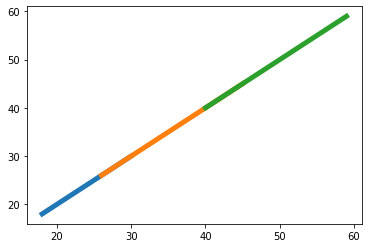

In [91]:
plt.plot(x,y, linewidth=5.0,linestyle='-')

In [92]:
x=[2,4,10]
y=[5,15,30]

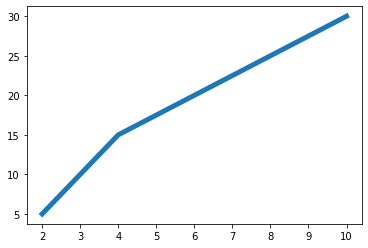

In [93]:
plt.plot(x,y, linewidth=5.0,linestyle='-')

In [94]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.852585,0.102610,0.812281,2.198920,0.032803,85.413341,2017.823982,7.40054,15.592859,0.026503,0.018802,0.152615,2825.975798,0.638064
std,0.512956,0.400879,0.873509,1.421597,0.178130,86.198054,0.380854,3.05754,8.730670,0.160633,0.291999,1.698614,4432.299494,0.795765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.00000,8.000000,0.000000,0.000000,0.000000,100.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.00000,15.000000,0.000000,0.000000,0.000000,792.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.00000,23.000000,0.000000,0.000000,0.000000,1911.500000,1.000000
max,4.000000,10.000000,6.000000,15.000000,1.000000,443.000000,2018.000000,12.00000,31.000000,1.000000,11.000000,53.000000,26667.000000,5.000000


In [97]:
Q1=df.quantile(0.45)#çeyrekler açıklığı hesaplama

In [98]:
Q1

no_of_adults                               2.0
no_of_children                             0.0
no_of_weekend_nights                       0.0
no_of_week_nights                          2.0
required_car_parking_space                 0.0
lead_time                                 47.0
arrival_year                            2018.0
arrival_month                              7.0
arrival_date                              14.0
repeated_guest                             0.0
no_of_previous_cancellations               0.0
no_of_previous_bookings_not_canceled       0.0
avg_price_per_room                       177.0
no_of_special_requests                     0.0
Name: 0.45, dtype: float64

In [99]:
Q2=df.quantile(0.85)#veriyi parçalara ayırdıktan sonra belirlenen sınır değerleri dışında kalan verileri aykırı değer olarak işaretler

In [100]:
Q2

no_of_adults                               2.0
no_of_children                             0.0
no_of_weekend_nights                       2.0
no_of_week_nights                          3.0
required_car_parking_space                 0.0
lead_time                                180.0
arrival_year                            2018.0
arrival_month                             11.0
arrival_date                              26.0
repeated_guest                             0.0
no_of_previous_cancellations               0.0
no_of_previous_bookings_not_canceled       0.0
avg_price_per_room                      8799.6
no_of_special_requests                     1.0
Name: 0.85, dtype: float64

In [101]:
IQR=Q2-Q1#IQR kullanılarak alt ve üst sınır değerleri hesaplanır
IQL=Q2+Q1

In [102]:
IQL

no_of_adults                               4.0
no_of_children                             0.0
no_of_weekend_nights                       2.0
no_of_week_nights                          5.0
required_car_parking_space                 0.0
lead_time                                227.0
arrival_year                            4036.0
arrival_month                             18.0
arrival_date                              40.0
repeated_guest                             0.0
no_of_previous_cancellations               0.0
no_of_previous_bookings_not_canceled       0.0
avg_price_per_room                      8976.6
no_of_special_requests                     1.0
dtype: float64

In [103]:
IQR

no_of_adults                               0.0
no_of_children                             0.0
no_of_weekend_nights                       2.0
no_of_week_nights                          1.0
required_car_parking_space                 0.0
lead_time                                133.0
arrival_year                               0.0
arrival_month                              4.0
arrival_date                              12.0
repeated_guest                             0.0
no_of_previous_cancellations               0.0
no_of_previous_bookings_not_canceled       0.0
avg_price_per_room                      8622.6
no_of_special_requests                     1.0
dtype: float64

In [104]:
veri=np.random.normal(50000,5000,50)

In [105]:
print(veri)

[53616.10748483 46570.37031487 50289.27219871 44898.60264604
 45995.56866685 47377.80943084 48736.94716175 46823.06969545
 55209.57517721 46589.5630755  45437.13617664 55802.90814875
 52087.02848911 56644.50066468 51511.69181296 54132.12736855
 44313.75279353 49585.63449862 47225.86729118 49125.05324673
 58327.98530724 44146.69770674 52913.710136   41393.31444864
 46424.65112817 50437.22218758 47477.92838143 43047.69712249
 48920.56173792 53629.38653163 47513.64596761 51654.17387169
 51146.45146603 46905.50663893 49486.7723202  48492.08055952
 55885.56121307 51192.424355   47021.61520879 51225.28494745
 49493.45108543 48187.80614537 49666.19645953 51968.73037259
 52229.52992682 51866.64404552 37629.28171476 47347.43764317
 46743.92335477 47267.14476877]


In [106]:
np.mean(veri)

49232.30806191336

In [107]:
np.median(veri)

49022.80749232149

In [108]:
veri.var()

15785328.05742291

In [109]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,945,0,Canceled


In [113]:
ilkdefa=df[df.repeated_guest==0]#integer tipindeki verileri string tipine çevirir
tekrarlı=df[df.repeated_guest==1]

Text(0, 0.5, 'no_of_special_requests')

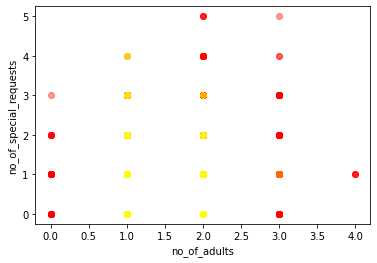

In [114]:
plt.scatter(ilkdefa.no_of_adults, ilkdefa.no_of_special_requests, color="red", label="İlk defa kiralayanlar", alpha=0.4)
plt.scatter(tekrarlı.no_of_adults, tekrarlı.no_of_special_requests, color="yellow", label="Daha önceden kaydı olanlar", alpha=0.4)
plt.xlabel("no_of_adults")
plt.ylabel("no_of_special_requests")

In [115]:
y=df.no_of_adults.values

In [141]:
yeniset=df.drop(['no_of_adults'],axis=1)#sütun silme

In [142]:
yeniset

,Booking_ID,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,945,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,INN09995,0,0,4,Meal Plan 1,0,Room_Type 4,109,2018,8,24,Online,0,0,0,1521,0,Canceled
9995,INN09996,0,2,1,Meal Plan 1,0,Room_Type 1,55,2018,4,3,Offline,0,0,0,75,1,Not_Canceled
9996,INN09997,0,2,1,Meal Plan 1,0,Room_Type 1,2,2017,9,12,Online,0,0,0,13867,1,Not_Canceled
9997,INN09998,0,0,3,Meal Plan 1,0,Room_Type 1,105,2018,10,12,Offline,0,0,0,75,0,Not_Canceled


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [144]:
X = df.iloc[:, [2,3]].values#istediğimiz veriye koordinat ile çağırmak
y = df.iloc[:, 4].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)#datasetimden test için küme yüzdem 0,25

In [146]:
X_train

array([[0, 0],
       [0, 1],
       [0, 2],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [147]:
X_test

array([[0, 1],
       [0, 2],
       [0, 1],
       ...,
       [1, 2],
       [0, 1],
       [0, 2]], dtype=int64)

In [148]:
y_test#test veri seti

array([3, 7, 0, ..., 5, 2, 2], dtype=int64)

In [149]:
y_train#eğitim veri seti

array([1, 2, 5, ..., 2, 2, 1], dtype=int64)

In [150]:
KNN = KNeighborsClassifier(n_neighbors=1)#k kadar ayırıp k kısmını test için kalan kısmınıda eğitim için kullanmak

In [151]:
KNN.fit(X_train, y_train)#eksik değerleri doldurma yani veri setini eğitme

KNeighborsClassifier(n_neighbors=1)

In [152]:
predictions = KNN.predict(X_test)#etiket bilgisiyle tahmin etme

In [153]:
predictions

array([2, 5, 2, ..., 2, 2, 5], dtype=int64)

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
data=[[2,4],[1.5,10],[24,57],[32,64]]

In [156]:
scaler= MinMaxScaler()# minimum ve maksimum değerleri bulur ve her birinden minimum değerden çıkarır ve maksimum-minimum değerine böler

In [157]:
print(scaler.fit(data))

MinMaxScaler()


In [158]:
print(scaler.data_max_)

[32. 64.]


In [159]:
print(scaler)

MinMaxScaler()


In [160]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,945,0,Canceled


In [161]:
from sklearn import linear_model

In [162]:
df[['avg_price_per_room']]#bağımlı değişken

,avg_price_per_room
0,65
1,10668
2,60
3,100
4,945
...,...
9994,1521
9995,75
9996,13867
9997,75


In [163]:
df[['no_of_children','repeated_guest','arrival_date']]#bağımsız değişkenler

,no_of_children,repeated_guest,arrival_date
0,0,0,2
1,0,0,6
2,0,0,28
3,0,0,20
4,0,0,11
...,...,...,...
9994,0,0,24
9995,0,0,3
9996,0,0,12
9997,0,0,12


In [164]:
reg=linear_model.LinearRegression()#doğrusal regresyon

In [165]:
reg.fit(df[['no_of_children','repeated_guest','arrival_date']], df['avg_price_per_room'])

LinearRegression()

In [167]:
reg.predict([[300,100,500]])#regresyon işleminde girdiğimiz yeni 3 bağımsız değişkene göre tahmin ettik

C:\Users\casper\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([233756.04099423])

In [168]:
reg.coef_#sabitleri

array([ 1589.08029115, -2549.93597136,    19.18850919])

In [169]:
reg.intercept_#a +bx a için

2431.2961916995296

In [170]:
a=reg.intercept_
b1=reg.coef_[0]
b2=reg.coef_[1]
b3=reg.coef_[2]
x1=300
x2=100
x3=500
y=a+b1*x1+b2*x2+b3*x3

In [171]:
y

233756.04099423077

In [172]:
duzeltme_mapping_type_of_meal_plan={'Not Selected':0,'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3}#string ifadeleri puanlama ya da integer değerlere atama diyebiliriz

In [173]:
df['type_of_meal_plan']=df['type_of_meal_plan'].map(duzeltme_mapping_type_of_meal_plan)
duzeltme_mapping_type_of_meal_plan={'Not Selected':0,'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3}

In [174]:
df['type_of_meal_plan']

0       1
1       0
2       1
3       1
4       0
       ..
9994    1
9995    1
9996    1
9997    1
9998    1
Name: type_of_meal_plan, Length: 9999, dtype: int64

In [175]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier#karar ağacı

In [176]:
import pandas as pd
import numpy as np
from sklearn import datasets

agac=['lead_time', 'arrival_date','avg_price_per_room','no_of_week_nights']

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = agac)
y = iris.target

In [177]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

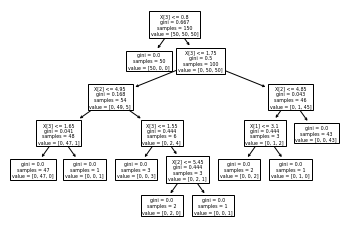

In [178]:
agac=tree.plot_tree(model)

In [183]:
from sklearn.cluster import KMeans#kümeleme ve ortalama
import pandas as pd
from sklearn.preprocessing import MinMaxScaler#minmax yöntemi ile normalize edelim
from matplotlib import pyplot as plt 

In [184]:
scaler=MinMaxScaler()

In [185]:
scaler.fit(df[['lead_time']])#
df['lead_time']=scaler.transform(df[['lead_time']])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,Room_Type 1,0.505643,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,0,0,Room_Type 1,0.011287,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,1,0,2,1,1,0,Room_Type 1,0.002257,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,1,0,Room_Type 1,0.476298,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,0,0,Room_Type 1,0.108352,2018,4,11,Online,0,0,0,945,0,Canceled


In [186]:
k_range=range(10,50)
k_range

range(10, 50)

In [187]:
list_dist=[]

In [188]:
for k in k_range:#k-en yakın komşu algoritması
    kmeans_modelim=KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['arrival_date','lead_time']])
    list_dist.append(kmeans_modelim.inertia_)

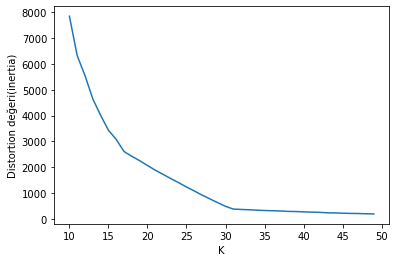

In [189]:
plt.xlabel('K')
plt.ylabel('Distortion değeri(inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [192]:
kmeans_model=KMeans(n_clusters=14)#14'ten kırıldı bu yüzden aşağıda 14 tane df yaptık
y_predicted=kmeans_model.fit_predict(df[['arrival_date','lead_time']])
y_predicted 

array([ 5,  2,  1, ..., 13, 13,  3])

In [193]:
df['kume']=y_predicted#kümeyi datasetimize ekledik
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,kume
0,INN00001,2,0,1,2,1,0,Room_Type 1,0.505643,2017,10,2,Offline,0,0,0,65,0,Not_Canceled,5
1,INN00002,2,0,2,3,0,0,Room_Type 1,0.011287,2018,11,6,Online,0,0,0,10668,1,Not_Canceled,2
2,INN00003,1,0,2,1,1,0,Room_Type 1,0.002257,2018,2,28,Online,0,0,0,60,0,Canceled,1
3,INN00004,2,0,0,2,1,0,Room_Type 1,0.476298,2018,5,20,Online,0,0,0,100,0,Canceled,3
4,INN00005,2,0,1,1,0,0,Room_Type 1,0.108352,2018,4,11,Online,0,0,0,945,0,Canceled,13


In [194]:
kmeans_model.cluster_centers_ #orta nokta bulma

array([[13.4602961 ,  0.2014498 ],
       [28.06603774,  0.18658754],
       [ 5.5115942 ,  0.17934701],
       [19.48563218,  0.17476519],
       [ 7.54037267,  0.17407428],
       [ 1.54776119,  0.1951282 ],
       [21.98137369,  0.20968789],
       [24.99030172,  0.19676286],
       [ 9.47649919,  0.16477824],
       [15.49931787,  0.20869121],
       [30.32438017,  0.2061032 ],
       [17.50421348,  0.2074435 ],
       [ 3.52941176,  0.22280189],
       [11.52166934,  0.16569139]])

In [195]:
df1=df[df.kume==0]
df2=df[df.kume==1]
df3=df[df.kume==2]
df4=df[df.kume==3]
df5=df[df.kume==4]
df6=df[df.kume==5]
df7=df[df.kume==6]
df8=df[df.kume==7]
df9=df[df.kume==8]
df10=df[df.kume==9]
df11=df[df.kume==10]
df12=df[df.kume==11]
df13=df[df.kume==12]
df14=df[df.kume==13]

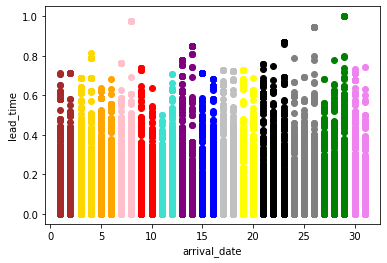

In [196]:
plt.xlabel('arrival_date')
plt.ylabel('lead_time')
plt.scatter(df1['arrival_date'],df1['lead_time'],color='purple')
plt.scatter(df2['arrival_date'],df2['lead_time'],color='green')
plt.scatter(df3['arrival_date'],df3['lead_time'],color='orange')
plt.scatter(df4['arrival_date'],df4['lead_time'],color='yellow')
plt.scatter(df5['arrival_date'],df5['lead_time'],color='pink')
plt.scatter(df6['arrival_date'],df6['lead_time'],color='brown')
plt.scatter(df7['arrival_date'],df7['lead_time'],color='black')
plt.scatter(df8['arrival_date'],df8['lead_time'],color='gray')
plt.scatter(df9['arrival_date'],df9['lead_time'],color='red')
plt.scatter(df10['arrival_date'],df10['lead_time'],color='blue')
plt.scatter(df11['arrival_date'],df11['lead_time'],color='violet')
plt.scatter(df12['arrival_date'],df12['lead_time'],color='silver')
plt.scatter(df13['arrival_date'],df13['lead_time'],color='gold')
plt.scatter(df14['arrival_date'],df14['lead_time'],color='Turquoise')

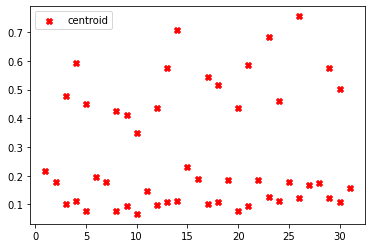

In [197]:
plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1],color='red',marker='X',label='centroid')
plt.legend()
plt.show()

In [198]:
import tensorflow as tf#zaman serisi çalışması
from tensorflow.keras.layers import Dense,LSTM  
from tensorflow.keras.models import Sequential  
from sklearn.preprocessing import MinMaxScaler

In [199]:
df.rename(columns={'lead_time':'LT'},inplace=True)
df = df['LT']
type(df)
df

0       0.505643
1       0.011287
2       0.002257
3       0.476298
4       0.108352
          ...   
9994    0.246050
9995    0.124153
9996    0.004515
9997    0.237020
9998    0.467269
Name: LT, Length: 9999, dtype: float64

In [200]:
data=np.array(df).reshape(-1,1)
type(df)

pandas.core.series.Series

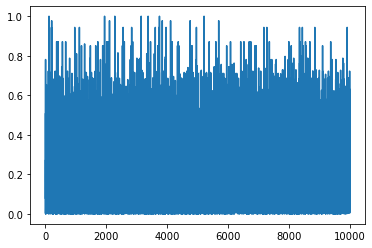

In [201]:
plt.plot(df)
plt.show()

In [202]:
scaler = MinMaxScaler()
data=scaler.fit_transform(data)

In [203]:
train=data[0:100,:]
test=data[100:,:]

In [204]:
def get_data(data,steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a= data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX), np.array(dataY)
steps=2

In [205]:
X_train,Y_train = get_data(train,steps)
X_test,Y_test=get_data(test,steps)
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [206]:
model=Sequential()#Katman ile bir model katman oluşturmanıza izin verir. Her katmanın aşağıdaki katmanı gösteren ağırlıklara sahiptir.

In [207]:
model.add(LSTM(512, input_shape = (1, steps)))# Bu benim 512 bellek bloklu ilk gizli katmanım
model.add(Dense(256)) #Bu benim 256 bellek bloklu ikinci gizli katmanım
model.add(Dense(1)) # bu benim çıkış katmanım
model.compile(loss = 'mean_squared_error', optimizer = 'adam')#katmak eklemek için add komutunu kullanıyoruz
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1054720   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,186,305
Trainable params: 1,186,305
Non-trainable params: 0
_________________________________________________________________


In [210]:
model.fit(X_train,Y_train,epochs=25,batch_size=1)#modeli veriyle eğitmek

Epoch 1/25
97/97 [==============================] - 2s 19ms/step - loss: 0.0319
Epoch 2/25
97/97 [==============================] - 2s 21ms/step - loss: 0.0305
Epoch 3/25
97/97 [==============================] - 2s 21ms/step - loss: 0.0303
Epoch 4/25
97/97 [==============================] - 2s 22ms/step - loss: 0.0311
Epoch 5/25
97/97 [==============================] - 2s 21ms/step - loss: 0.0298
Epoch 6/25
97/97 [==============================] - 2s 21ms/step - loss: 0.0307
Epoch 7/25
97/97 [==============================] - 2s 20ms/step - loss: 0.0304
Epoch 8/25
97/97 [==============================] - 2s 22ms/step - loss: 0.0309
Epoch 9/25
97/97 [==============================] - 2s 21ms/step - loss: 0.0308
Epoch 10/25
97/97 [==============================] - 2s 21ms/step - loss: 0.0310
Epoch 11/25
97/97 [==============================] - 2s 23ms/step - loss: 0.0309
Epoch 12/25
97/97 [==============================] - 2s 22ms/step - loss: 0.0306
Epoch 13/25
97/97 [==================

In [211]:
Y_pred=model.predict(X_test)
Y_pred=scaler.inverse_transform(Y_pred)
Y_test=Y_test.reshape(-1,1)
Y_test=scaler.inverse_transform(Y_test)

310/310 [==============================] - 2s 5ms/step


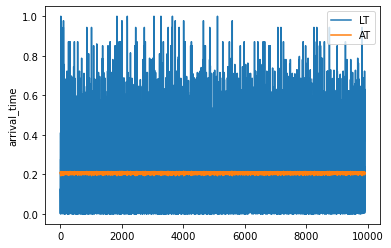

In [212]:
plt.plot(Y_test, label = 'LT')#eğittimiz veriyi grafik ile gösterme
plt.plot(Y_pred, label = 'AT')
plt.ylabel('lead_time')
plt.ylabel('arrival_time')
plt.legend()
plt.show()

In [213]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

In [214]:
import matplotlib as mpl#çizim için parametreler

In [215]:
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = (0.9,0.9,0.9)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'w'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 15